Original image Shape     : 512 x 512
image Shape After Padding: 522 x 522
shape after convolution  : 520 x 520
shape after pooling:     : 518 x 518


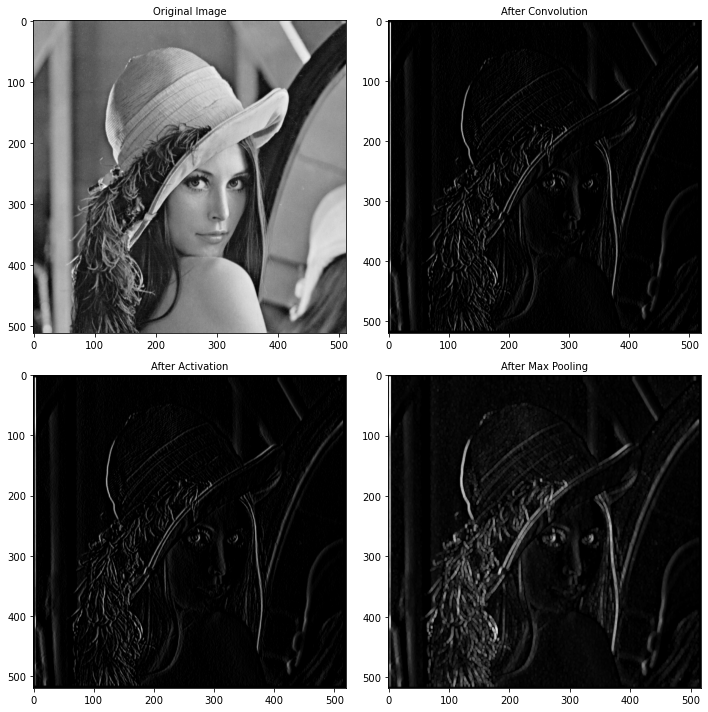

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray
  
def conv2d(img, kernel, pad, stride):
    pad_size    = pad
    strides     = stride
    kernel_size = len(kernel) # only for square matrix 
    
    H, W = img.shape
    print("Original image Shape     :", H,'x',W)
    
    # Zero Padding
    padded_img = np.pad(img, (pad_size, pad_size), 'constant',constant_values=(0, 0))
    H, W = padded_img.shape
    print("image Shape After Padding:", H,'x',W)
    
    # Convolution
    output_H, output_W = H - (kernel_size - 1), W - (kernel_size - 1)
    
    conv_output = np.zeros((output_H,output_W))
    for h in range(output_H):
        for w in range(output_W):
            # extract the window
            filtered_data = padded_img[h:h+kernel_size,w:w+kernel_size]*kernel
            conv_output[h,w] = np.sum(filtered_data)
    
    return conv_output

# Activation Function 
def sigmoid (idata):
    sigmoidOutput = (1/(1 + np.exp(-idata))) # Sigmoid
    return sigmoidOutput

def Relu (idata):
    idata[idata <0 ] = 0           
    ReluOutput = idata
    return ReluOutput

def maxPooling(idata, kernel_size):
    H, W =idata.shape
    output_H, output_W = H - (kernel_size - 1), W - (kernel_size - 1)

    pooledOutput = np.zeros((output_H,output_W))
    for h in range(output_H):
        for w in range(output_W):
            # extract the window
            window_data = idata[h:h+kernel_size,w:w+kernel_size]
            pooledOutput[h,w] = np.max(window_data)
            
    return pooledOutput


# read the test image & Convert to GrayScle
img = plt.imread('Image/lena.bmp')
img = np.array(img)
img = rgb2gray(img)

# Data Pre-Processing : Normalization (Min-Max)
img = img / 255

sobel_x = [[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]]

ConvOutput = conv2d(img,sobel_x,5,0)
ReluOutput = Relu(ConvOutput)
PoolOutput = maxPooling(ReluOutput, 3)

H, W = ConvOutput.shape
print("shape after convolution  :", H,'x',W)
H, W = PoolOutput.shape
print("shape after pooling:     :", H,'x',W)

# For Visualization
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(img, 'gray')
axes[0, 0].set_title("Original Image", fontsize=10)
axes[0, 1].imshow(ConvOutput, 'gray')
axes[0, 1].set_title("After Convolution", fontsize=10)
axes[1, 0].imshow(ReluOutput, 'gray')
axes[1, 0].set_title("After Activation", fontsize=10)
axes[1, 1].imshow(PoolOutput, 'gray')
axes[1, 1].set_title("After Max Pooling", fontsize=10)
fig.tight_layout()

In [2]:
print(PoolOutput)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.63615843 0.63615843 ... 0.         0.         0.        ]
 [0.         1.90847529 1.90847529 ... 0.         0.         0.        ]
 ...
 [0.         0.51672706 0.51672706 ... 0.         0.         0.        ]
 [0.         0.17224235 0.17224235 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
